In [41]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os

# Configure NumPy's print options for backward compatibility
np.set_printoptions(legacy='1.25')

# Import scikit-learn modules for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from collections import Counter

In [42]:
# File path for the dataset
dataset_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Check if the dataset file already exists to avoid re-downloading
if os.path.exists(dataset_path):
    print("Dataset already exists. Loading from file...")
    df = pd.read_csv(dataset_path)
else:
    print("Dataset not found. Downloading...")
    df = pd.read_csv(dataset_path)

# Standardize column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Identify categorical columns
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

# Convert 'totalcharges' to numeric, coercing errors to NaN
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

# Fill NaN values in 'totalcharges' with 0
df.totalcharges = df.totalcharges.fillna(0)

# Encode 'churn' column: 'yes' -> 1, 'no' -> 0
df.churn = (df.churn == 'yes').astype(int)

# Check for missing values in 'totalcharges' column
num_missing = df.totalcharges.isna().sum()
print(f"Total missing values in 'totalcharges': {num_missing}")

Dataset already exists. Loading from file...
Total missing values in 'totalcharges': 0


In [43]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Standardize column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Identify categorical columns
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

# Clean categorical columns: lowercase and replace spaces with underscores
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

# Convert 'totalcharges' to numeric, coercing errors to NaN
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

# Fill NaN values in 'totalcharges' with 0
df.totalcharges = df.totalcharges.fillna(0)

# Encode 'churn' column: 'yes' -> 1, 'no' -> 0
df.churn = (df.churn == 'yes').astype(int)

num_missing = df.totalcharges.isna().sum()
print(f"Total missing values in 'totalcharges': {num_missing}")

Total missing values in 'totalcharges': 0


In [44]:
# Function to split the dataset and reset index
def prepare_datasets(df, target_col, test_size=0.2, val_size=0.25, random_state=1):
    # Split the dataset into train and test
    df_full_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # Split the train dataset into training and validation sets
    df_train, df_val = train_test_split(df_full_train, test_size=val_size, random_state=random_state)
    
    # Reset index for all datasets
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # Separate features and target
    y_train = df_train[target_col].values
    y_val = df_val[target_col].values
    y_test = df_test[target_col].values
    
    # Drop target column from features
    df_train = df_train.drop(columns=[target_col])
    df_val = df_val.drop(columns=[target_col])
    df_test = df_test.drop(columns=[target_col])
    
    return df_train, df_val, df_test, y_train, y_val, y_test

# Usage
df_train, df_val, df_test, y_train, y_val, y_test = prepare_datasets(df, target_col='churn')

In [45]:
# Numerical feature columns
numerical = ['tenure', 'monthlycharges', 'totalcharges']

# Define categorical feature columns
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [46]:
# DictVectorizer for categorical and numerical feature transformation
dv = DictVectorizer(sparse=False)

# Convert training data to dictionary format for DictVectorizer
train_dict = df_train[categorical + numerical].to_dict(orient='records')

# Apply transformation to convert dictionaries into feature vectors
X_train = dv.fit_transform(train_dict)

# Scale the numerical features
scaler = StandardScaler()
X_train[:, -len(numerical):] = scaler.fit_transform(X_train[:, -len(numerical):])

# Logistic regression model with increased max_iter and alternative solver
model = LogisticRegression(max_iter=5000, solver='saga', C=0.1)

# Fit the model with training data
model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=5000, solver='saga')

In [47]:
# Convert validation data to dictionary format for DictVectorizer
val_dict = df_val[categorical + numerical].to_dict(orient='records')

# Transform validation data using the fitted DictVectorizer
X_val = dv.transform(val_dict)

# Predict probabilities for the validation data
y_pred = model.predict_proba(X_val)[:, 1]

# Make churn decision based on probability threshold of 0.5
churn_decision = (y_pred >= 0.5)

# Calculate accuracy of the predictions
accuracy = (y_val == churn_decision).mean()

# Print validation
print(f"Validation accuracy: {accuracy:.4f}")

Validation accuracy: 0.2761


In [48]:
# Print
print(f"Length of y_val: {len(y_val)}")

Length of y_val: 1409


In [49]:
# Calculate the number of correct predictions
correct_predictions = (y_val == churn_decision).sum()

# Print
print(f"Number of correct predictions: {correct_predictions}")

accuracy = (y_val == churn_decision).mean()
print(f"Validation accuracy: {accuracy:.4f}")

Number of correct predictions: 389
Validation accuracy: 0.2761


In [50]:
accuracy = 1132 / 1409
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8034


In [51]:
accuracy_score(y_val, y_pred >= 0.5)

0.27608232789212206

In [52]:
# Thresholds from 0 to 1 in steps of 0.05
thresholds = np.linspace(0, 1, 21)

# List to store accuracy scores for each threshold
scores = []

# Iterate over thresholds and calculate accuracy
for t in thresholds:
    # Make churn predictions based on the current threshold
    churn_decision = y_pred >= t
    
    # Calculate accuracy for the current threshold
    score = accuracy_score(y_val, churn_decision)
    
    # Print the threshold and corresponding accuracy
    print('Threshold: %.2f, Accuracy: %.3f' % (t, score))
    
    # Append the accuracy score to the list
    scores.append(score)

Threshold: 0.00, Accuracy: 0.274
Threshold: 0.05, Accuracy: 0.276
Threshold: 0.10, Accuracy: 0.276
Threshold: 0.15, Accuracy: 0.276
Threshold: 0.20, Accuracy: 0.276
Threshold: 0.25, Accuracy: 0.276
Threshold: 0.30, Accuracy: 0.276
Threshold: 0.35, Accuracy: 0.276
Threshold: 0.40, Accuracy: 0.276
Threshold: 0.45, Accuracy: 0.276
Threshold: 0.50, Accuracy: 0.276
Threshold: 0.55, Accuracy: 0.276
Threshold: 0.60, Accuracy: 0.276
Threshold: 0.65, Accuracy: 0.276
Threshold: 0.70, Accuracy: 0.276
Threshold: 0.75, Accuracy: 0.276
Threshold: 0.80, Accuracy: 0.276
Threshold: 0.85, Accuracy: 0.276
Threshold: 0.90, Accuracy: 0.276
Threshold: 0.95, Accuracy: 0.280
Threshold: 1.00, Accuracy: 0.288


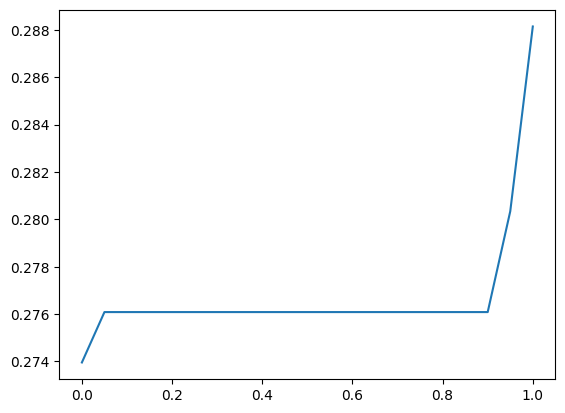

In [53]:
plt.plot(thresholds, scores)

In [55]:
# Prediction that every custumers are not churning
Counter(y_pred >= 1.0) 

Counter({True: 1235, False: 174})

In [56]:
proportion_non_churn = 1 - y_val.mean()
print(f"Proportion of non-churn: {proportion_non_churn:.4f}")

Proportion of non-churn: 0.7260


In [58]:
# Count occurrences of each class in y_val
class_counts = Counter(y_val)

print(class_counts)

Counter({0: 1023, 1: 386})


In [59]:
# Boolean masks for actual positive and negative instances
actual_positive = (y_val == 1)  # Instances where churn occurred
actual_negative = (y_val == 0)  # Instances where churn did not occur

# Print number of actual positives and negatives
print(f"Number of actual positive (churn) cases: {actual_positive.sum()}")
print(f"Number of actual negative (non-churn) cases: {actual_negative.sum()}")

Number of actual positive (churn) cases: 386
Number of actual negative (non-churn) cases: 1023


In [47]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [48]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [49]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[921, 102],
       [176, 210]])

In [50]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

In [51]:
p = tp / (tp + fp)
p

0.6730769230769231

In [52]:
r = tp / (tp + fn)
r

0.5440414507772021

In [53]:
fpr = fp / (fp + tn)
fpr

0.09970674486803519

In [54]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [55]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [56]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [57]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,357,53,666,0.862694,0.348974
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,102,176,921,0.544041,0.099707
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,75,19,311,1004,0.194301,0.018573
80,0.8,12,1,374,1022,0.031088,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


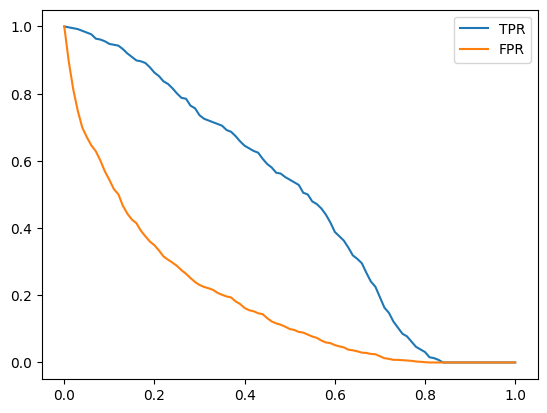

In [58]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

In [59]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [60]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [61]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [62]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

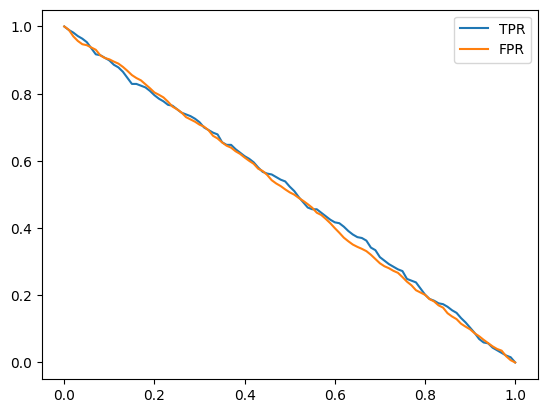

In [63]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

In [64]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [65]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])

y_ideal_pred = np.linspace(0, 1, len(y_val))

In [66]:
1 - y_val.mean()

0.7260468417317246

In [67]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

1.0

In [68]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


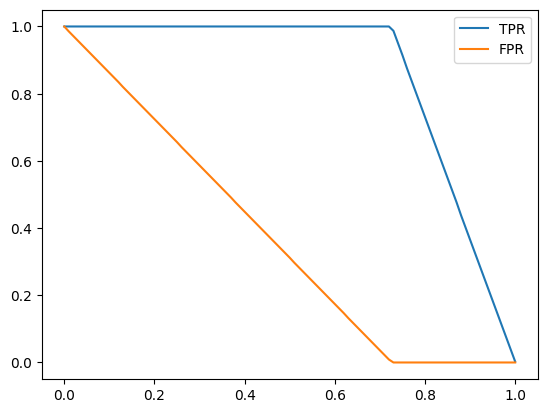

In [69]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

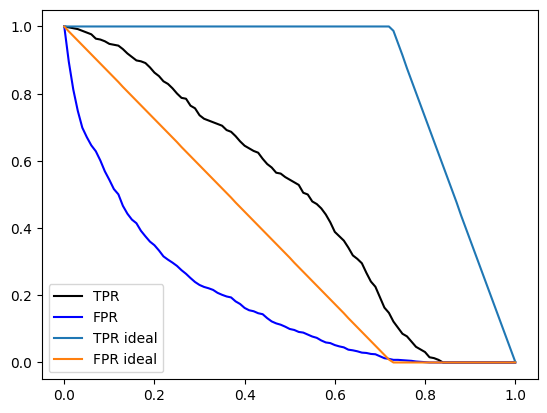

In [70]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

plt.legend()

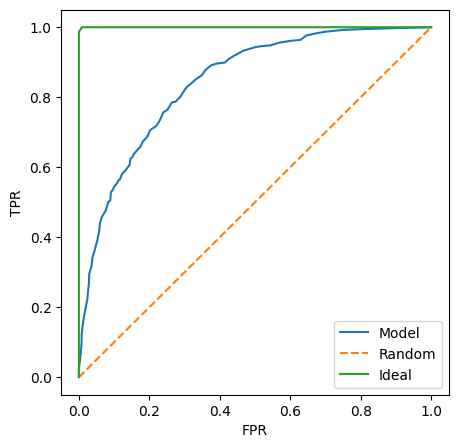

In [71]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [72]:
from sklearn.metrics import roc_curve

In [73]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

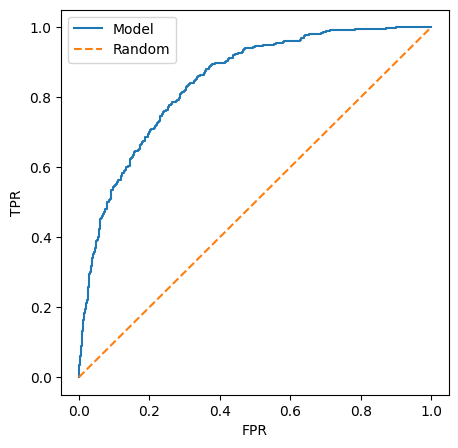

In [74]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()